In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [4]:
# Load the dataset
data = pd.read_csv('telco_churn.csv')

In [5]:
# Data preprocessing
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)
data.drop(['customerID'], axis=1, inplace=True)
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No', value=0, inplace=True)

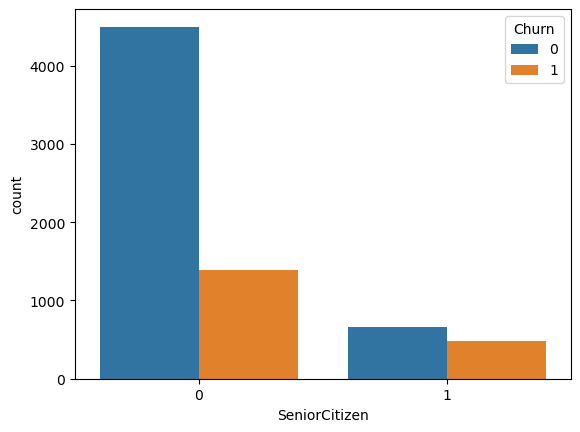

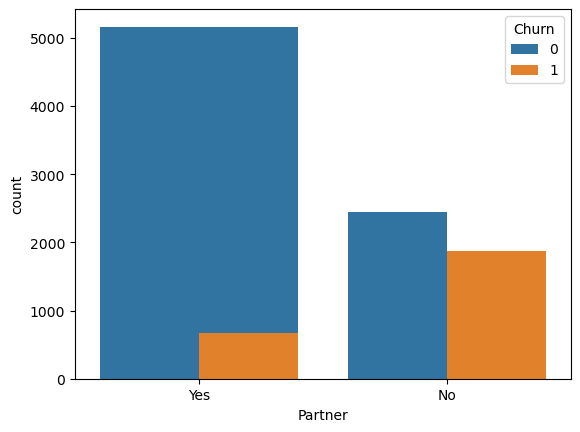

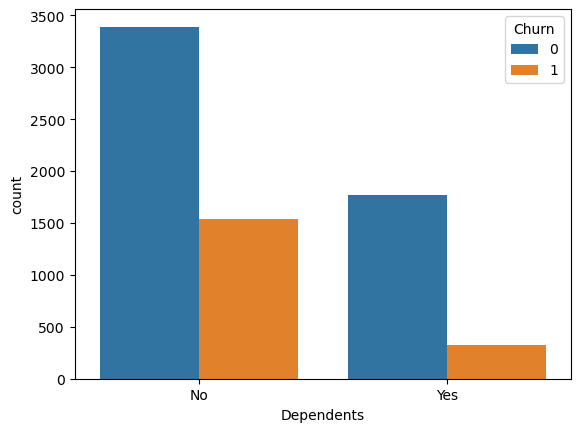

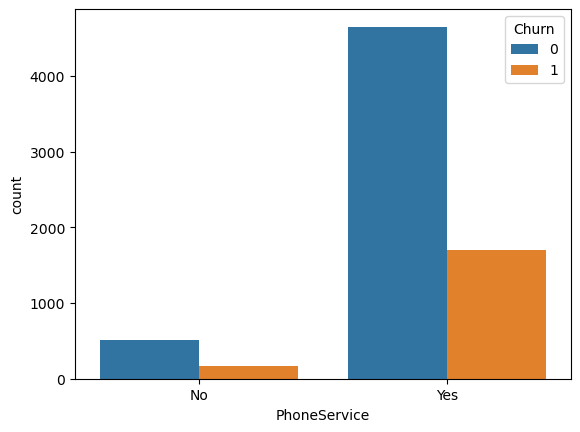

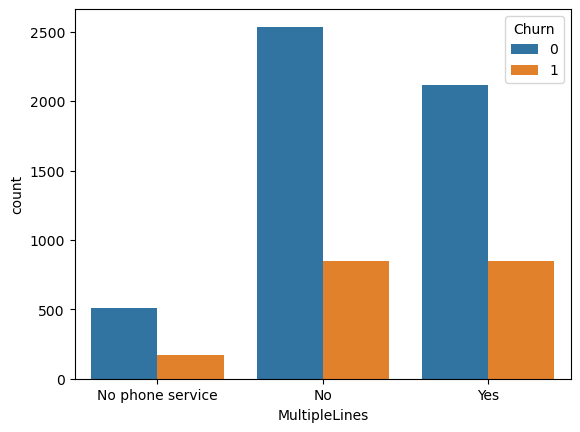

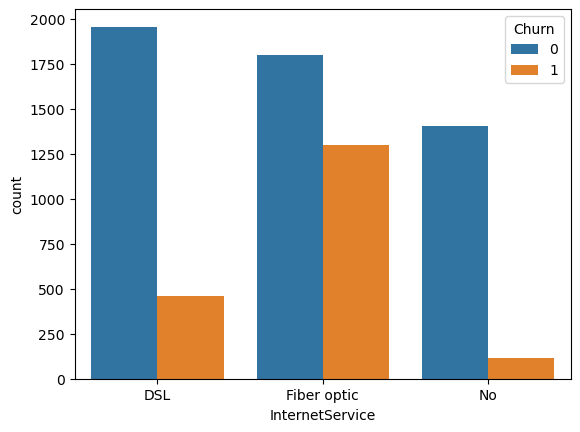

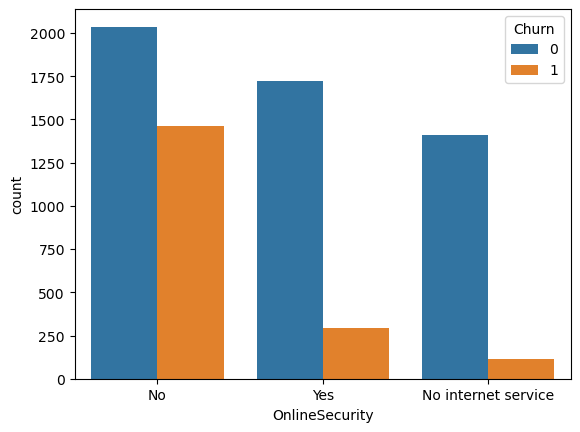

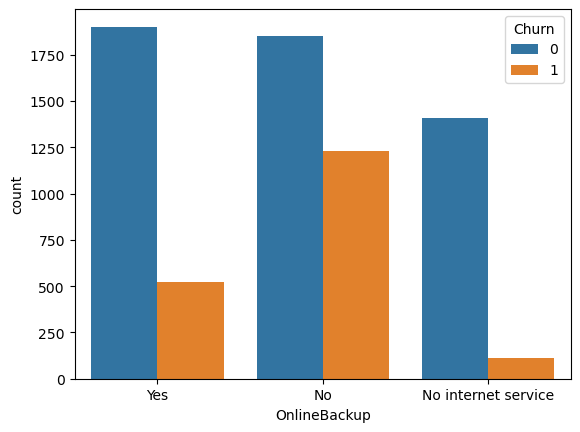

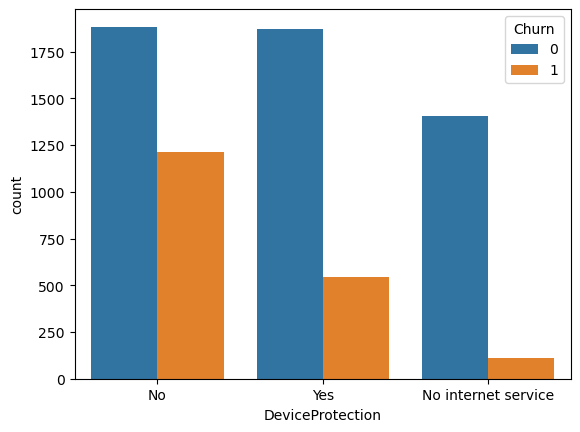

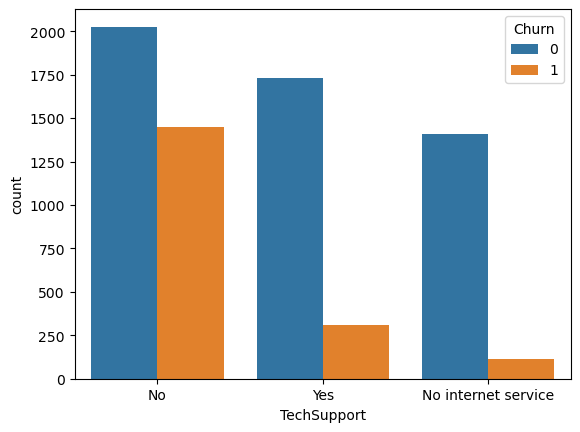

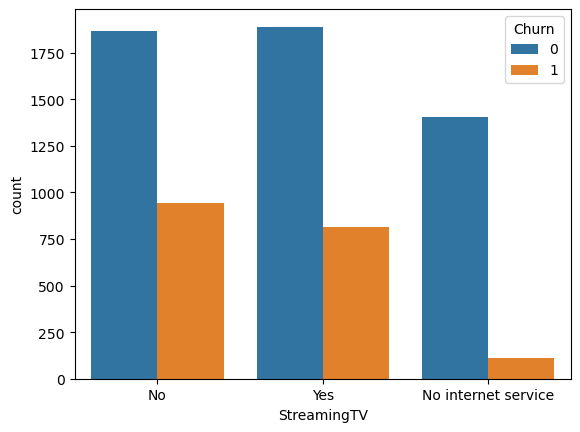

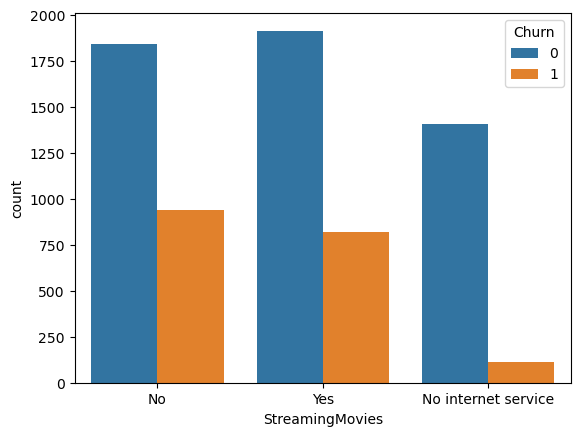

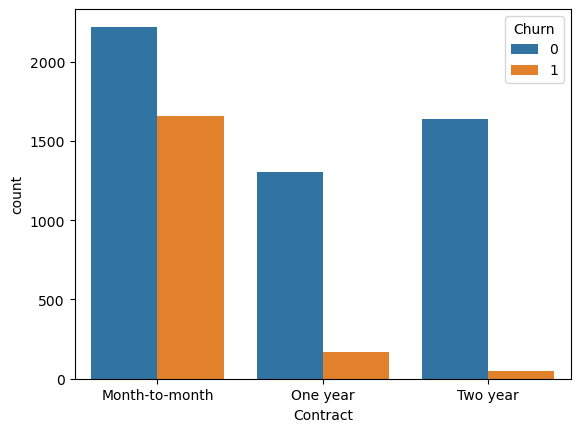

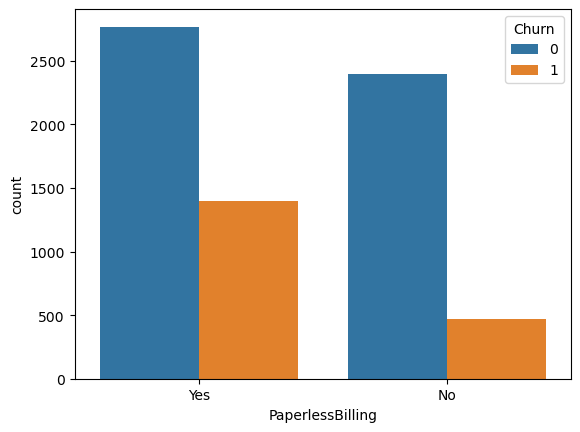

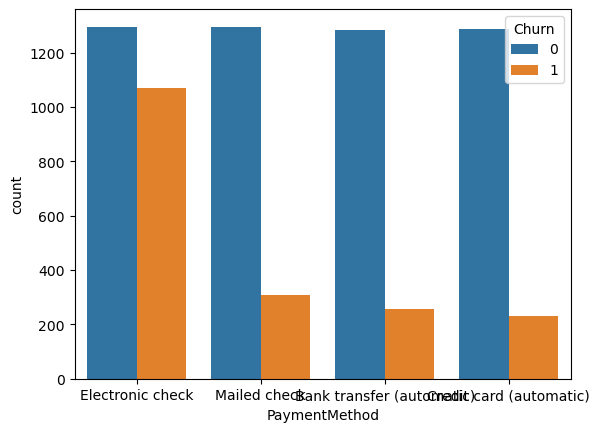

In [6]:
# Data exploration
sns.countplot(x='Churn', data=data)

for i, col in enumerate(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']):
    plt.figure(i)
    sns.countplot(x=col, hue='Churn', data=data)

In [7]:
# Data preparation
X = data.drop(['Churn'], axis=1)
y = data['Churn']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Model building and evaluation
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('XGBoost', XGBClassifier())
]

In [9]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name + ' accuracy: ', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Decision Tree accuracy:  0.7128642501776831
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1033
           1       0.46      0.50      0.48       374

    accuracy                           0.71      1407
   macro avg       0.64      0.65      0.64      1407
weighted avg       0.72      0.71      0.72      1407

[[815 218]
 [186 188]]
Random Forest accuracy:  0.7867803837953091
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

[[932 101]
 [199 175]]
XGBoost accuracy:  0.7810945273631841
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.49      0.54       374

    accura